In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Представьте себе, что мы аналитики, которым поручено повышение возврата инвестиций в call-центр компании. 
# Сотрудники звонят потенциальным клиентам и продают продукт. Вы посмотрели исторические данные и обнаружили:
# В типичном call-центре 50 звонков на 1 сотрудника.
# Вероятность конверсии 4%.
# Средний доход с конверсии 100$.
# В центре 100 сотрудников.
# Каждый сотрудник зарабатывает 200$ в день.
# Такой код моделирует ситуацию с параметрами n = 50, p = 0.04

In [3]:
# Количество сотрудников
employees = 100
# Зарплата одного сотрудника
wage = 200
# Звонков на сотрудника
n = 50
# Вероятность успеха
p = 0.04
# Доход с одного звонка
revenue = 100

In [4]:
# Биномиально распределённая переменная
conversions = np.random.binomial(n, p, size=employees)

In [5]:
conversions

array([1, 2, 1, 0, 2, 2, 3, 3, 2, 0, 2, 3, 2, 4, 2, 6, 1, 3, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 3, 1, 2, 0, 1, 2, 2, 3, 0,
       2, 1, 0, 1, 5, 2, 3, 0, 2, 2, 5, 2, 2, 1, 3, 2, 2, 1, 1, 4, 4, 2,
       2, 2, 1, 3, 2, 1, 1, 3, 1, 2, 1, 0, 1, 2, 0, 5, 1, 4, 2, 3, 5, 1,
       3, 5, 1, 4, 1, 1, 5, 1, 1, 5, 2, 1])

In [6]:
print('Конверсий на сотрудника: ' + str(round(np.mean(conversions), 2)))
print('Стандартное отклонение конверсии: ' + str(round(np.std(conversions), 2)))
print('Всего конверсий: ' + str(np.sum(conversions)))
print('Доходы: ' + str(np.sum(conversions)*revenue))
print('Расходы: ' + str(employees*wage))
print('Прибыль: ' + str(np.sum(conversions)*revenue - employees*wage))

Конверсий на сотрудника: 2.01
Стандартное отклонение конверсии: 1.33
Всего конверсий: 201
Доходы: 20100
Расходы: 20000
Прибыль: 100


In [7]:
sims = 1000
sim_conversions = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]

In [8]:
sim_profits = np.array(sim_conversions)*revenue - employees*wage

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


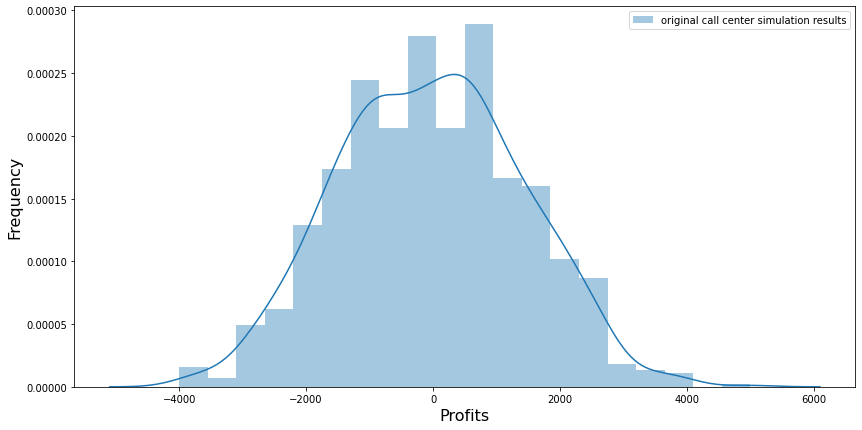

In [9]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='original call center simulation results')
ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()

In [10]:
employees2 = 100
wage2 = 200 
n2 = 55
p2 = 0.05
revenue2 = 100

In [11]:
sim_conversions_up = [np.sum(np.random.binomial(n2, p2, size=employees)) for i in range(sims)]
sim_profits_up = np.array(sim_conversions_up)*revenue2 - employees2*wage2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


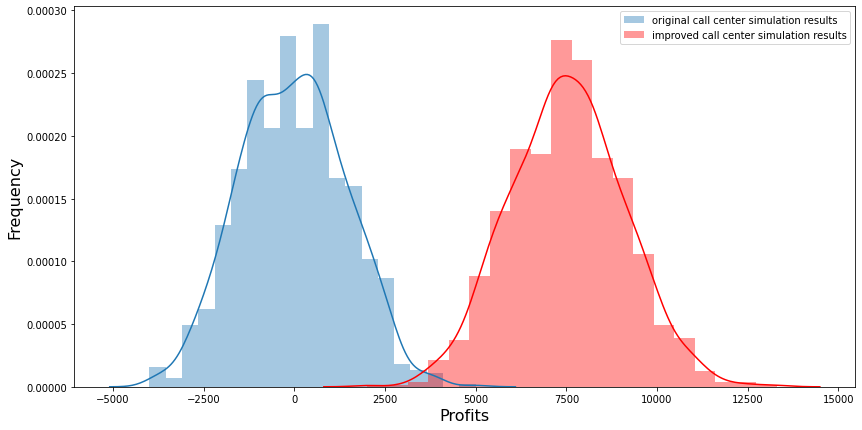

In [12]:
# Отображаем и сохраняем результат как гистограмму
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits, bins=20, label='original call center simulation results')
ax = sns.distplot(sim_profits_up, bins=20, label='improved call center simulation results', color='red')
ax.set_xlabel("Profits",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.legend()